In [2]:
import pandas as pd
import analysis_functs as funct
import numpy as np
import yfinance as yf

start_date = "2023-11-16" # hard coded dates for analysis
end_date = "2024-11-16"

portf = pd.read_csv("portfolios/simple_portf.csv")



In [3]:
portf

,TICKER,QUANTITY
0,JPM,10
1,GOOG,10
2,AMZN,10
3,STLA,10


In [4]:
retdf = pd.DataFrame()

In [6]:
for tickers in portf.iloc[:,0]: # get price data for each stock in the original portf dataframe and also their normalized returns
    retdf[tickers] = (yf.download(tickers, start=start_date, end=end_date, interval="5d")['Close'])
    retdf[tickers + " Normalized Return"] = retdf[tickers]/retdf.iloc[0][tickers]

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
og_alloc = []
for ticker in portf.iloc[:,0]:
    og_alloc.append(retdf.iloc[0][ticker])

In [8]:
portf["ORIGINAL_VALUE"] = portf["QUANTITY"]*og_alloc
portf

,TICKER,QUANTITY,ORIGINAL_VALUE
0,JPM,10,1471.577911
1,GOOG,10,1382.034302
2,AMZN,10,1428.300018
3,STLA,10,186.430168


In [9]:
portf["ALLOCATION"] = portf["ORIGINAL_VALUE"]/sum(portf["ORIGINAL_VALUE"])
portf

,TICKER,QUANTITY,ORIGINAL_VALUE,ALLOCATION
0,JPM,10,1471.577911,0.329334
1,GOOG,10,1382.034302,0.309295
2,AMZN,10,1428.300018,0.319649
3,STLA,10,186.430168,0.041722


In [10]:
sum(portf["ORIGINAL_VALUE"])

4468.342399597168

In [11]:
retdf.head()

,JPM,JPM Normalized Return,GOOG,GOOG Normalized Return,AMZN,AMZN Normalized Return,STLA,STLA Normalized Return
Date,,,,,,,,
2023-11-16,147.157791,1.000000,138.203430,1.000000,142.830002,1.000000,18.643017,1.000000
2023-11-21,148.634735,1.010036,138.123718,0.999423,143.899994,1.007491,18.886351,1.013052
2023-12-01,152.395050,1.035589,132.842697,0.961211,147.029999,1.029406,20.599037,1.104920
2023-12-06,151.880066,1.032090,130.959427,0.947584,144.520004,1.011832,21.095060,1.131526
2023-12-11,154.591003,1.050512,134.217743,0.971161,145.889999,1.021424,21.095060,1.131526


In [12]:
retdf.iloc[0]

JPM                       147.157791
JPM Normalized Return       1.000000
GOOG                      138.203430
GOOG Normalized Return      1.000000
AMZN                      142.830002
AMZN Normalized Return      1.000000
STLA                       18.643017
STLA Normalized Return      1.000000
Name: 2023-11-16 00:00:00, dtype: float64

In [13]:
for ticker in portf.iloc[:,0]:
    retdf.iloc[0][ticker]

In [14]:
og_alloc = []
for ticker in portf.iloc[:,0]:
    og_alloc.append(retdf.iloc[0][ticker])

In [15]:
retdf.head()

,JPM,JPM Normalized Return,GOOG,GOOG Normalized Return,AMZN,AMZN Normalized Return,STLA,STLA Normalized Return
Date,,,,,,,,
2023-11-16,147.157791,1.000000,138.203430,1.000000,142.830002,1.000000,18.643017,1.000000
2023-11-21,148.634735,1.010036,138.123718,0.999423,143.899994,1.007491,18.886351,1.013052
2023-12-01,152.395050,1.035589,132.842697,0.961211,147.029999,1.029406,20.599037,1.104920
2023-12-06,151.880066,1.032090,130.959427,0.947584,144.520004,1.011832,21.095060,1.131526
2023-12-11,154.591003,1.050512,134.217743,0.971161,145.889999,1.021424,21.095060,1.131526


In [16]:
for tickers in portf.iloc[:,0]:
    retdf.insert(retdf.columns.get_loc(tickers)+2,tickers+ " Pos Value", retdf[tickers+" Normalized Return"]*portf.iloc[np.where(portf == "JPM")[0][0]]["ORIGINAL_VALUE"])

In [17]:
retdf.head()

,JPM,JPM Normalized Return,JPM Pos Value,GOOG,GOOG Normalized Return,GOOG Pos Value,AMZN,AMZN Normalized Return,AMZN Pos Value,STLA,STLA Normalized Return,STLA Pos Value
Date,,,,,,,,,,,,
2023-11-16,147.157791,1.000000,1471.577911,138.203430,1.000000,1471.577911,142.830002,1.000000,1471.577911,18.643017,1.000000,1471.577911
2023-11-21,148.634735,1.010036,1486.347351,138.123718,0.999423,1470.729146,143.899994,1.007491,1482.602043,18.886351,1.013052,1490.785354
2023-12-01,152.395050,1.035589,1523.950500,132.842697,0.961211,1414.497300,147.029999,1.029406,1514.850492,20.599037,1.104920,1625.975474
2023-12-06,151.880066,1.032090,1518.800659,130.959427,0.947584,1394.444404,144.520004,1.011832,1488.990011,21.095060,1.131526,1665.128834
2023-12-11,154.591003,1.050512,1545.910034,134.217743,0.971161,1429.138666,145.889999,1.021424,1503.105075,21.095060,1.131526,1665.128834


In [18]:
retdf.head()

,JPM,JPM Normalized Return,JPM Pos Value,GOOG,GOOG Normalized Return,GOOG Pos Value,AMZN,AMZN Normalized Return,AMZN Pos Value,STLA,STLA Normalized Return,STLA Pos Value
Date,,,,,,,,,,,,
2023-11-16,147.157791,1.000000,1471.577911,138.203430,1.000000,1471.577911,142.830002,1.000000,1471.577911,18.643017,1.000000,1471.577911
2023-11-21,148.634735,1.010036,1486.347351,138.123718,0.999423,1470.729146,143.899994,1.007491,1482.602043,18.886351,1.013052,1490.785354
2023-12-01,152.395050,1.035589,1523.950500,132.842697,0.961211,1414.497300,147.029999,1.029406,1514.850492,20.599037,1.104920,1625.975474
2023-12-06,151.880066,1.032090,1518.800659,130.959427,0.947584,1394.444404,144.520004,1.011832,1488.990011,21.095060,1.131526,1665.128834
2023-12-11,154.591003,1.050512,1545.910034,134.217743,0.971161,1429.138666,145.889999,1.021424,1503.105075,21.095060,1.131526,1665.128834


In [23]:
portf_val = pd.DataFrame()
for ticker in portf.iloc[:,0]:
  
    portf_val[ticker + " Position Value"] = retdf[ticker + " Pos Value"]
    print(portf_val[ticker + " Position Value"].head(1))
    print(retdf[ticker + " Pos Value"].head(1))
portf_val["Total"] = portf_val.sum(axis=1)

Date
2023-11-16    1471.577911
Name: JPM Position Value, dtype: float64
Date
2023-11-16    1471.577911
Name: JPM Pos Value, dtype: float64
Date
2023-11-16    1471.577911
Name: GOOG Position Value, dtype: float64
Date
2023-11-16    1471.577911
Name: GOOG Pos Value, dtype: float64
Date
2023-11-16    1471.577911
Name: AMZN Position Value, dtype: float64
Date
2023-11-16    1471.577911
Name: AMZN Pos Value, dtype: float64
Date
2023-11-16    1471.577911
Name: STLA Position Value, dtype: float64
Date
2023-11-16    1471.577911
Name: STLA Pos Value, dtype: float64


In [24]:
portf_val.head()

,JPM Position Value,GOOG Position Value,AMZN Position Value,STLA Position Value,Total
Date,,,,,
2023-11-16,1471.577911,1471.577911,1471.577911,1471.577911,5886.311646
2023-11-21,1486.347351,1470.729146,1482.602043,1490.785354,5930.463893
2023-12-01,1523.950500,1414.497300,1514.850492,1625.975474,6079.273766
2023-12-06,1518.800659,1394.444404,1488.990011,1665.128834,6067.363909
2023-12-11,1545.910034,1429.138666,1503.105075,1665.128834,6143.282609


<Axes: xlabel='Date'>

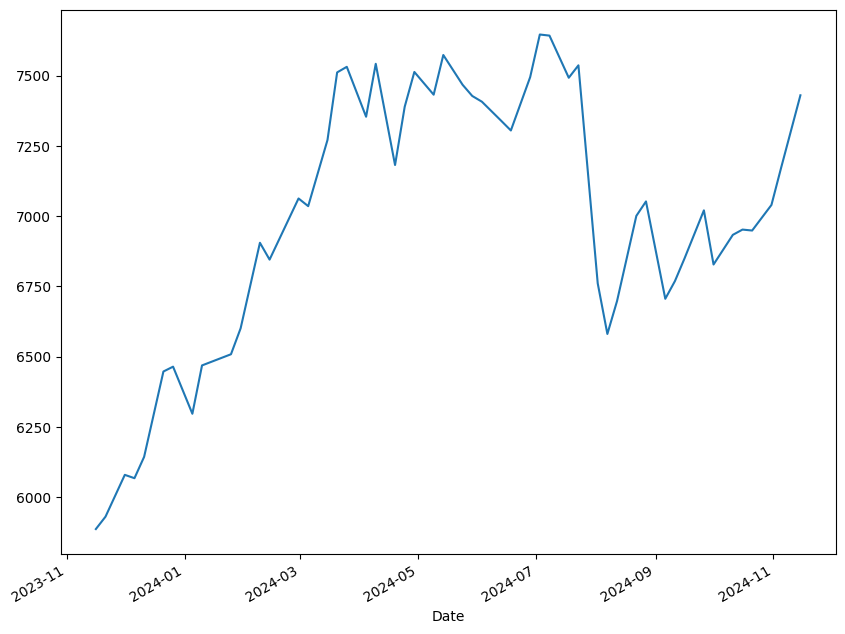

In [25]:
# plot the portfolio!!
import matplotlib.pyplot as plt
%matplotlib inline
portf_val["Total"].plot(figsize=(10,8))

<Axes: xlabel='Date'>

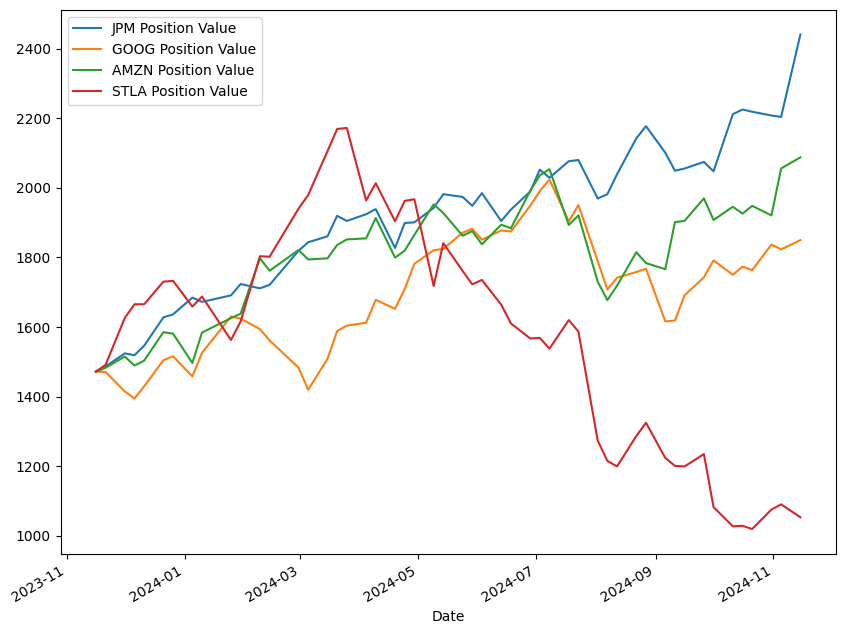

In [26]:
portf_val.drop('Total', axis = 1).plot(figsize=(10,8))

In [27]:
portf_val["Daily Return"] = portf_val["Total"].pct_change(1)

In [28]:
portf_val.head()

,JPM Position Value,GOOG Position Value,AMZN Position Value,STLA Position Value,Total,Daily Return
Date,,,,,,
2023-11-16,1471.577911,1471.577911,1471.577911,1471.577911,5886.311646,NaN
2023-11-21,1486.347351,1470.729146,1482.602043,1490.785354,5930.463893,0.007501
2023-12-01,1523.950500,1414.497300,1514.850492,1625.975474,6079.273766,0.025092
2023-12-06,1518.800659,1394.444404,1488.990011,1665.128834,6067.363909,-0.001959
2023-12-11,1545.910034,1429.138666,1503.105075,1665.128834,6143.282609,0.012513


In [29]:
sharpe = portf_val["Daily Return"].mean()/portf_val["Daily Return"].std() # assumes risk free rate of 0%

In [31]:
sharpe

np.float64(2.9540726625222433)

In [30]:
sharpe = (252**.5)*sharpe

In [27]:
sharpe

2.954073252173293